# Geodesics on Surfaces

## Introduction

A **geodesic** is a curve that represents the shortest path between two points on a surface, generalizing the concept of a straight line in Euclidean space. Geodesics are fundamental objects in differential geometry and general relativity.

## Mathematical Foundation

### Parametric Surfaces

A surface in $\mathbb{R}^3$ can be parameterized by two coordinates $(u, v)$:

$$\mathbf{r}(u, v) = \begin{pmatrix} x(u,v) \\ y(u,v) \\ z(u,v) \end{pmatrix}$$

### First Fundamental Form

The metric on the surface is described by the first fundamental form, which measures arc length:

$$ds^2 = E\,du^2 + 2F\,du\,dv + G\,dv^2$$

where the coefficients are:

$$E = \mathbf{r}_u \cdot \mathbf{r}_u, \quad F = \mathbf{r}_u \cdot \mathbf{r}_v, \quad G = \mathbf{r}_v \cdot \mathbf{r}_v$$

### Geodesic Equations

A curve $\gamma(t) = \mathbf{r}(u(t), v(t))$ is a geodesic if it satisfies the geodesic equations:

$$\frac{d^2u}{dt^2} + \Gamma^u_{uu}\left(\frac{du}{dt}\right)^2 + 2\Gamma^u_{uv}\frac{du}{dt}\frac{dv}{dt} + \Gamma^u_{vv}\left(\frac{dv}{dt}\right)^2 = 0$$

$$\frac{d^2v}{dt^2} + \Gamma^v_{uu}\left(\frac{du}{dt}\right)^2 + 2\Gamma^v_{uv}\frac{du}{dt}\frac{dv}{dt} + \Gamma^v_{vv}\left(\frac{dv}{dt}\right)^2 = 0$$

where $\Gamma^i_{jk}$ are the Christoffel symbols of the second kind, computed from the metric coefficients:

$$\Gamma^u_{ij} = \frac{1}{2}g^{uk}\left(\frac{\partial g_{kj}}{\partial u^i} + \frac{\partial g_{ki}}{\partial u^j} - \frac{\partial g_{ij}}{\partial u^k}\right)$$

with $g^{ij}$ being the inverse metric tensor.

## Examples

We will compute and visualize geodesics on two classical surfaces:
1. **Sphere**: Great circles are geodesics
2. **Torus**: More complex geodesic behavior

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')

## 1. Geodesics on a Sphere

For a sphere of radius $R$, using spherical coordinates $(\theta, \phi)$:

$$\mathbf{r}(\theta, \phi) = \begin{pmatrix} R\sin\theta\cos\phi \\ R\sin\theta\sin\phi \\ R\cos\theta \end{pmatrix}$$

The metric is:

$$ds^2 = R^2 d\theta^2 + R^2\sin^2\theta\, d\phi^2$$

So $E = R^2$, $F = 0$, $G = R^2\sin^2\theta$.

In [2]:
def sphere_surface(theta, phi, R=1.0):
    """Parametric representation of a sphere."""
    x = R * np.sin(theta) * np.cos(phi)
    y = R * np.sin(theta) * np.sin(phi)
    z = R * np.cos(theta)
    return x, y, z

def sphere_christoffel(theta, phi, R=1.0):
    """Compute non-zero Christoffel symbols for sphere."""
    # Only non-zero symbols for sphere:
    # Γ^θ_φφ = -sin(θ)cos(θ)
    # Γ^φ_θφ = Γ^φ_φθ = cot(θ)
    Gamma_theta_phiphi = -np.sin(theta) * np.cos(theta)
    Gamma_phi_thetaphi = np.cos(theta) / (np.sin(theta) + 1e-10)  # cot(θ)
    return Gamma_theta_phiphi, Gamma_phi_thetaphi

def sphere_geodesic_eq(y, t, R=1.0):
    """Geodesic equations for sphere.
    y = [theta, phi, dtheta/dt, dphi/dt]
    """
    theta, phi, dtheta, dphi = y
    
    Gamma_theta_phiphi, Gamma_phi_thetaphi = sphere_christoffel(theta, phi, R)
    
    # d²θ/dt² = -Γ^θ_φφ (dφ/dt)²
    d2theta = -Gamma_theta_phiphi * dphi**2
    
    # d²φ/dt² = -2Γ^φ_θφ (dθ/dt)(dφ/dt)
    d2phi = -2 * Gamma_phi_thetaphi * dtheta * dphi
    
    return [dtheta, dphi, d2theta, d2phi]

In [3]:
# Compute geodesic on sphere
R = 1.0

# Initial conditions: start at (θ₀, φ₀) with initial velocity
theta0 = np.pi / 4
phi0 = 0.0
dtheta0 = 0.5
dphi0 = 1.0

y0_sphere = [theta0, phi0, dtheta0, dphi0]
t_sphere = np.linspace(0, 10, 1000)

# Solve geodesic equations
solution_sphere = odeint(sphere_geodesic_eq, y0_sphere, t_sphere, args=(R,))
theta_geo = solution_sphere[:, 0]
phi_geo = solution_sphere[:, 1]

# Convert to Cartesian coordinates
x_geo, y_geo, z_geo = sphere_surface(theta_geo, phi_geo, R)

## 2. Geodesics on a Torus

A torus can be parameterized as:

$$\mathbf{r}(u, v) = \begin{pmatrix} (R + r\cos v)\cos u \\ (R + r\cos v)\sin u \\ r\sin v \end{pmatrix}$$

where $R$ is the major radius and $r$ is the minor radius.

The metric coefficients are:

$$E = (R + r\cos v)^2, \quad F = 0, \quad G = r^2$$

In [4]:
def torus_surface(u, v, R=2.0, r=1.0):
    """Parametric representation of a torus."""
    x = (R + r * np.cos(v)) * np.cos(u)
    y = (R + r * np.cos(v)) * np.sin(u)
    z = r * np.sin(v)
    return x, y, z

def torus_christoffel(u, v, R=2.0, r=1.0):
    """Compute Christoffel symbols for torus."""
    # Metric coefficients
    E = (R + r * np.cos(v))**2
    G = r**2
    
    # Derivatives
    dE_dv = -2 * r * (R + r * np.cos(v)) * np.sin(v)
    
    # Non-zero Christoffel symbols
    Gamma_u_uv = r * np.sin(v) / (R + r * np.cos(v))
    Gamma_v_uu = (R + r * np.cos(v)) * np.sin(v) / r
    
    return Gamma_u_uv, Gamma_v_uu

def torus_geodesic_eq(y, t, R=2.0, r=1.0):
    """Geodesic equations for torus.
    y = [u, v, du/dt, dv/dt]
    """
    u, v, du, dv = y
    
    Gamma_u_uv, Gamma_v_uu = torus_christoffel(u, v, R, r)
    
    # d²u/dt² = -2Γ^u_uv (du/dt)(dv/dt)
    d2u = -2 * Gamma_u_uv * du * dv
    
    # d²v/dt² = -Γ^v_uu (du/dt)²
    d2v = -Gamma_v_uu * du**2
    
    return [du, dv, d2u, d2v]

In [5]:
# Compute geodesic on torus
R_torus = 2.0
r_torus = 1.0

# Initial conditions
u0 = 0.0
v0 = 0.0
du0 = 1.0
dv0 = 0.8

y0_torus = [u0, v0, du0, dv0]
t_torus = np.linspace(0, 20, 2000)

# Solve geodesic equations
solution_torus = odeint(torus_geodesic_eq, y0_torus, t_torus, args=(R_torus, r_torus))
u_geo = solution_torus[:, 0]
v_geo = solution_torus[:, 1]

# Convert to Cartesian coordinates
x_geo_torus, y_geo_torus, z_geo_torus = torus_surface(u_geo, v_geo, R_torus, r_torus)

## Visualization

We now visualize the geodesics on both surfaces. The geodesics appear as curves that locally minimize distance.

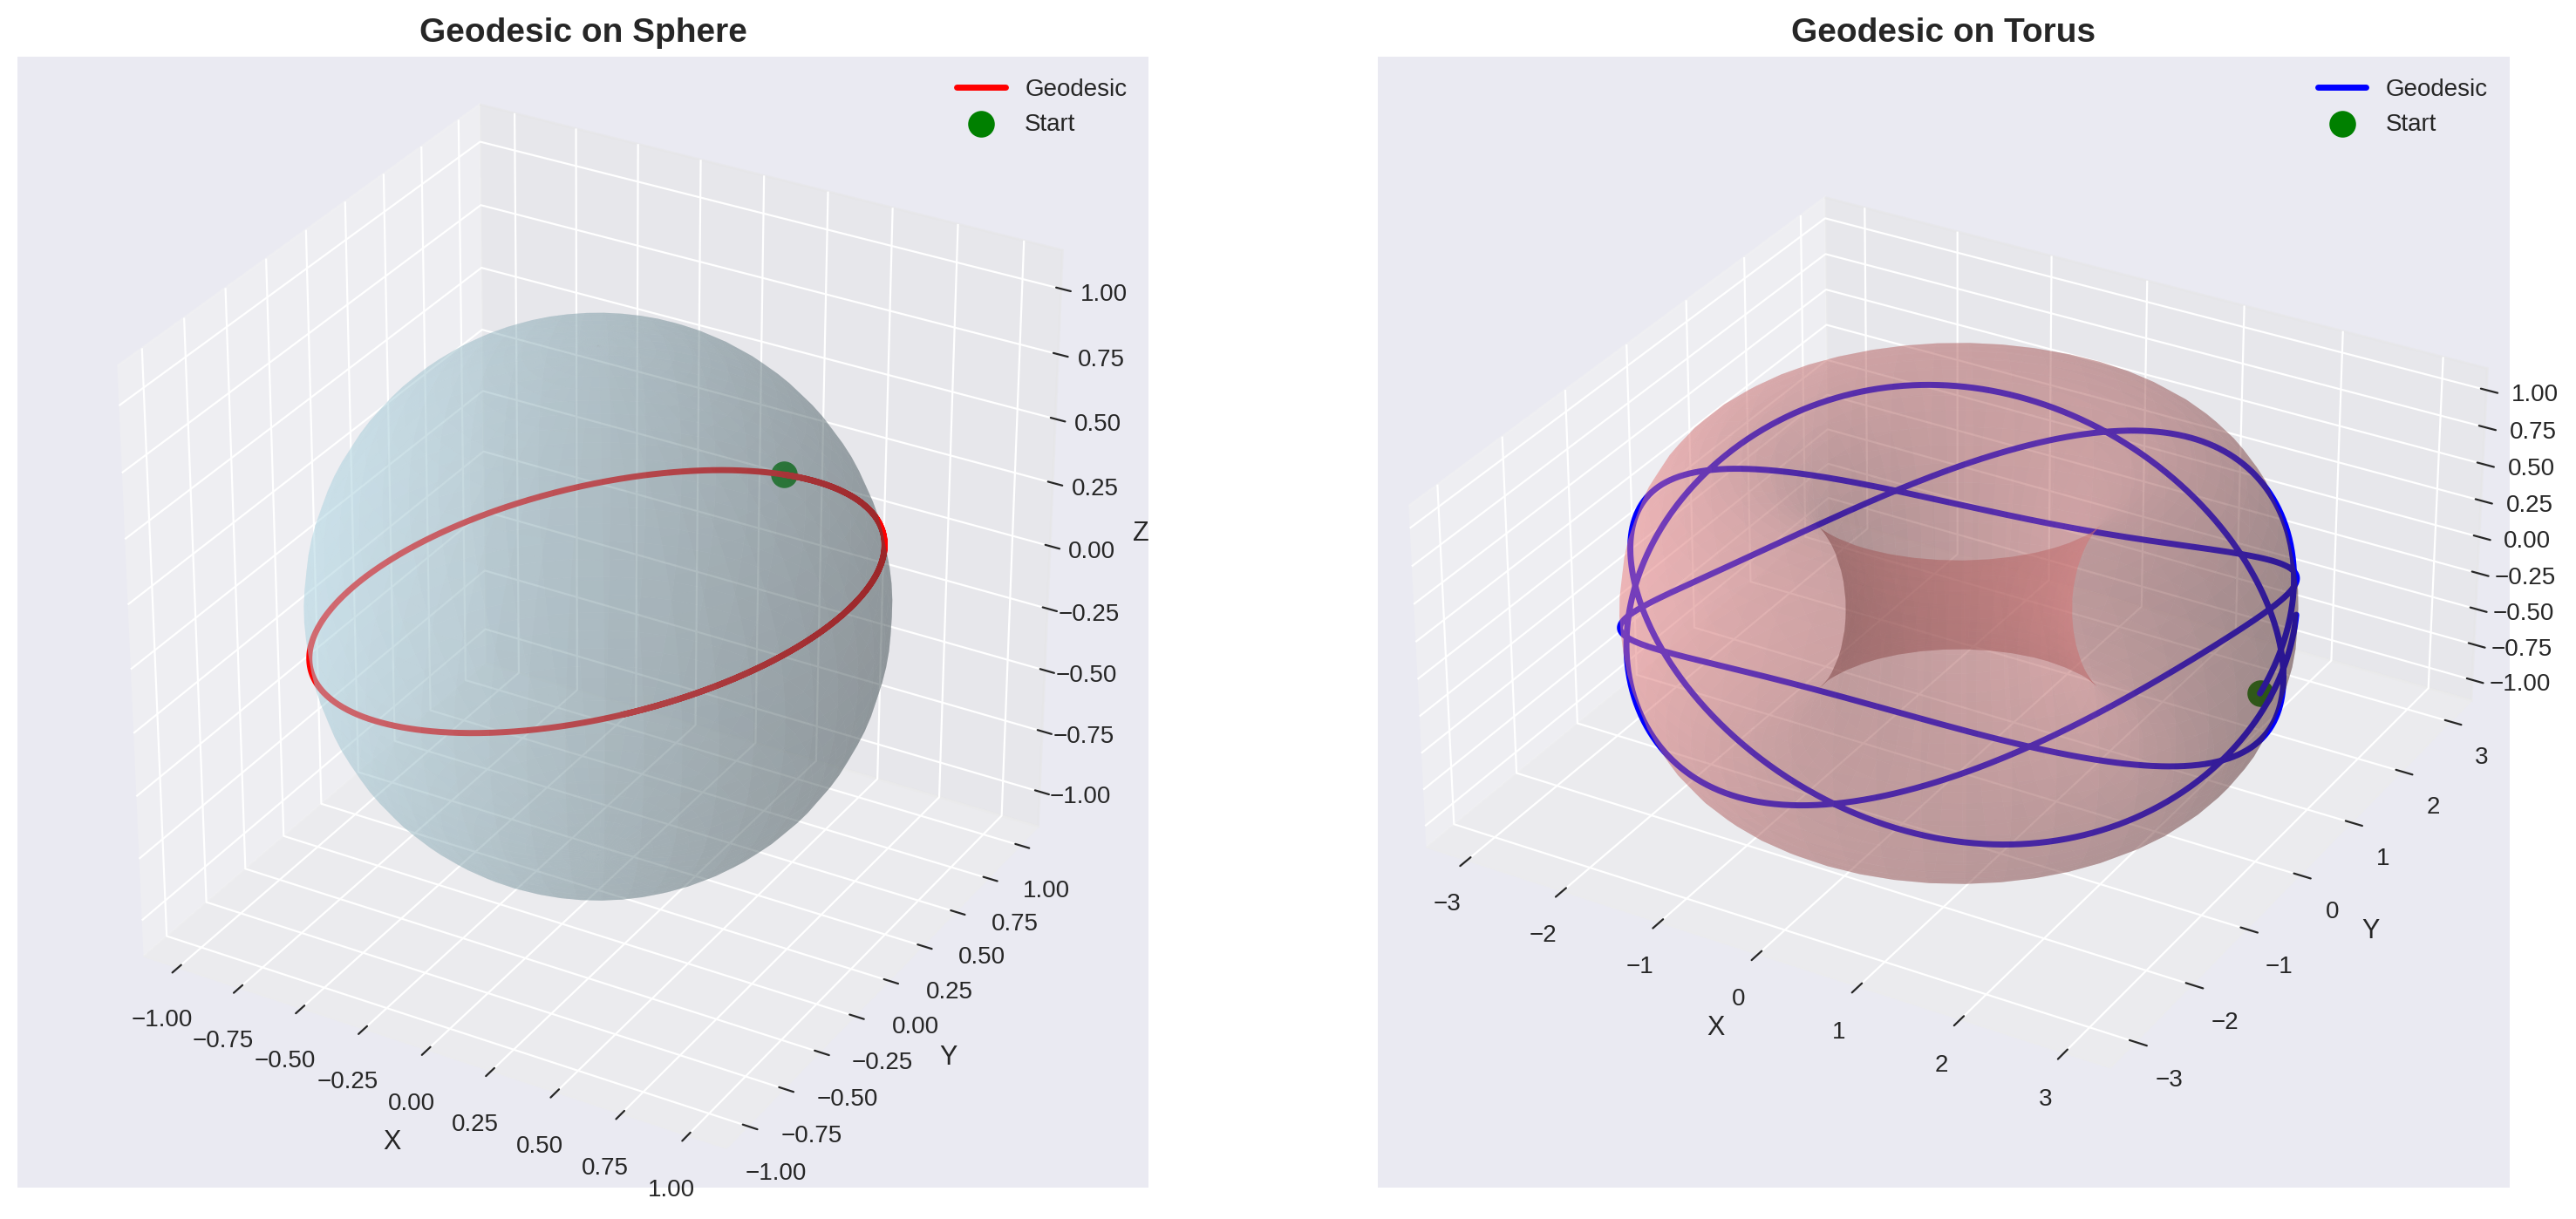

Geodesics computed and visualized successfully!
Sphere geodesic: 1000 points computed
Torus geodesic: 2000 points computed


In [6]:
fig = plt.figure(figsize=(16, 7))

# Plot 1: Geodesic on Sphere
ax1 = fig.add_subplot(121, projection='3d')

# Create sphere surface mesh
theta_mesh = np.linspace(0, np.pi, 50)
phi_mesh = np.linspace(0, 2*np.pi, 50)
Theta, Phi = np.meshgrid(theta_mesh, phi_mesh)
X_sphere, Y_sphere, Z_sphere = sphere_surface(Theta, Phi, R)

# Plot sphere surface
ax1.plot_surface(X_sphere, Y_sphere, Z_sphere, alpha=0.3, color='lightblue', edgecolor='none')

# Plot geodesic
ax1.plot(x_geo, y_geo, z_geo, 'r-', linewidth=2.5, label='Geodesic')
ax1.scatter([x_geo[0]], [y_geo[0]], [z_geo[0]], color='green', s=100, label='Start', zorder=5)

ax1.set_xlabel('X', fontsize=11)
ax1.set_ylabel('Y', fontsize=11)
ax1.set_zlabel('Z', fontsize=11)
ax1.set_title('Geodesic on Sphere', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_box_aspect([1,1,1])

# Plot 2: Geodesic on Torus
ax2 = fig.add_subplot(122, projection='3d')

# Create torus surface mesh
u_mesh = np.linspace(0, 2*np.pi, 50)
v_mesh = np.linspace(0, 2*np.pi, 50)
U, V = np.meshgrid(u_mesh, v_mesh)
X_torus, Y_torus, Z_torus = torus_surface(U, V, R_torus, r_torus)

# Plot torus surface
ax2.plot_surface(X_torus, Y_torus, Z_torus, alpha=0.3, color='lightcoral', edgecolor='none')

# Plot geodesic
ax2.plot(x_geo_torus, y_geo_torus, z_geo_torus, 'b-', linewidth=2.5, label='Geodesic')
ax2.scatter([x_geo_torus[0]], [y_geo_torus[0]], [z_geo_torus[0]], 
           color='green', s=100, label='Start', zorder=5)

ax2.set_xlabel('X', fontsize=11)
ax2.set_ylabel('Y', fontsize=11)
ax2.set_zlabel('Z', fontsize=11)
ax2.set_title('Geodesic on Torus', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_box_aspect([1,1,0.5])

plt.tight_layout()
plt.savefig('geodesics_on_surfaces_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Geodesics computed and visualized successfully!")
print(f"Sphere geodesic: {len(x_geo)} points computed")
print(f"Torus geodesic: {len(x_geo_torus)} points computed")

## Physical Interpretation

### Geodesics on the Sphere

On a sphere, geodesics are **great circles** - circles whose centers coincide with the sphere's center. These represent the shortest paths between points, which is why airplanes follow great circle routes.

### Geodesics on the Torus

Geodesics on a torus exhibit more complex behavior:
- **Meridian circles** (circles that go through the hole) are geodesics
- **Inner and outer equators** are geodesics
- Generic geodesics can wind around the torus in complex patterns, potentially densely covering the surface

## Conclusion

Geodesics generalize the notion of straight lines to curved spaces. They satisfy the geodesic equation, which is a second-order ODE system derived from the calculus of variations. The Christoffel symbols encode how the surface curves and determine the geodesic trajectories.

These concepts are fundamental in:
- **General Relativity**: Free-falling particles follow geodesics in curved spacetime
- **Optimal Control**: Geodesics represent energy-minimizing paths
- **Computer Graphics**: Surface parameterization and texture mapping
- **Robotics**: Motion planning on configuration manifolds